In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging

In [2]:
from typing import Tuple,Dict,List

In [3]:
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar el IterativeImputer
from sklearn.impute import IterativeImputer

In [4]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [5]:
import os
os.getcwd()  # Verifica el directorio de trabajo actual
os.chdir('/home/sagemaker-user/data-bbog-integration-fabrica-personas/src/')  # Cambia al directorio raíz del proyecto


In [6]:
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.intermediate.nodes as intermediate
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as model_input
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
# import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as model_output

In [7]:
%load_ext kedro.ipython

[09/23/24 15:52:20] INFO     Resolved project path as:                                              ]8;id=981645;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=934054;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/23/24 15:52:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=725769;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=496133;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=174925;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=138503;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=493915;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=148569;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=294372;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=591596;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=129910;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=243896;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=653581;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=657643;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [8]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=296025;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=306896;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/05/24 14:34:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=725583;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=726230;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=459730;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=102258;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=670619;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=135922;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=380112;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=582547;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

## Patrametros

In [8]:
params= catalog.list
parametros= catalog.load("parameters")

[09/23/24 15:52:23] INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=470867;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=758298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### Lectura

In [9]:
models=catalog.load('info_save_select')

[09/23/24 15:52:31] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=448262;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=42902;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [10]:
xgb_model=models["modelo_produccion"]["best_model"]
xgb_model

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 10), max_iter=500,
              random_state=42)

In [9]:
# xgb_model=catalog.load('xgb_model')

[09/05/24 14:45:43] INFO     Loading data from 'xgb_model' (PickleDataSet)...                   ]8;id=740381;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=162204;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [87]:
# rf_model=catalog.load('rf_model')

[09/05/24 15:35:30] INFO     Loading data from 'rf_model' (PickleDataSet)...                    ]8;id=213134;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=197579;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
# modelo=catalog.load('info_save_all')

[09/10/24 15:22:13] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=841183;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=371628;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
marzo=catalog.load('master_agosto2024')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 marzo=catalog.load('master_agosto2024')                                                      │
│   2                                                                                              │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_cata │
│ log.py:500 in load                                                                               │
│                                                                                                  │
│   497 │   │   │   >>> df = io.load("cars")                                                       │
│   498 │   │   """                                                                                │
│   499 │   │   load_version = Version(version, None) if version else None                         │
│ ❱ 500 │   │   dataset = self._get_dataset(name, version=load_version)                            │
│   501 │   │                                                                                      │
│   502 │   │   self._logger.info(                                                                 │
│   503 │   │   │   "Loading data from '%s' (%s)...", name, type(dataset).__name__                 │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_cata │
│ log.py:427 in _get_dataset                                                                       │
│                                                                                                  │
│   424 │   │   │   │   if matches:                                                                │
│   425 │   │   │   │   │   suggestions = ", ".join(matches)                                       │
│   426 │   │   │   │   │   error_msg += f" - did you mean one of these instead: {suggestions}"    │
│ ❱ 427 │   │   │   raise DatasetNotFoundError(error_msg)                                          │
│   428 │   │   data_set = self._data_sets[data_set_name]                                          │
│   429 │   │   if version and isinstance(data_set, AbstractVersionedDataset):                     │
│   430 │   │   │   # we only want to return a similar-looking dataset,                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
DatasetNotFoundError: Dataset 'master_agosto2024' not found in the catalog - did you mean one of these instead: 
master_ago2023, master_oct2023, master_mar2024

In [12]:
marzo=catalog.load('master_mar2024')

[09/23/24 15:52:54] INFO     Loading data from 'master_mar2024' (ParquetDataSet)...             ]8;id=145314;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=398383;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [13]:
marzo.shape

(3082850, 429)

In [11]:
marzo.head(5)

,hashvalue1,periodo,birthdate,sex,nivel_educativo,mar_status,estrato,hire_dt,vlr_activos,vlr_ing_bru_mes,...,fid_target_shift_-1,cs_target_shift_-1,fac_target_shift_-1,lib_target_shift_-1,sus_target_shift_-1,veh_target_shift_-1,viv_target_shift_-1,ord_target_shift_-1,otras_ord_target_shift_-1,finesa_target_shift_-1
0,CC1000000872,202403,2001-02-24,F,2.0,S,0,2023-02-20,20000000.0,4600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CC1000001336,202403,2001-06-20,F,2.0,S,0,2023-08-18,10000000.0,1600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CC1000001402,202403,1998-11-11,F,3.0,S,2,2017-12-01,60000000.0,2150000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CC1000001408,202403,2000-12-14,F,2.0,S,0,2022-08-20,2000000.0,2000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC1000001476,202403,2001-05-16,M,2.0,S,0,2021-02-12,0.0,1700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
abril=catalog.load('master_abril2024')
marzo.shape

[09/13/24 16:11:18] INFO     Loading data from 'master_abril2024' (ParquetDataSet)...           ]8;id=88272;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=668150;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

(3082850, 429)

In [13]:
variables= parametros['vars']

In [14]:
marzo = marzo[variables]
marzo.shape

(3082850, 121)

In [15]:
marzo['periodo'].value_counts()


periodo
202403    3082850
Name: count, dtype: int64

In [16]:
abril = abril[variables]
abril.shape

(3076308, 106)

### raw

In [14]:
df=pd.DataFrame(marzo)#.head()

In [15]:
df= raw.validar_columnas(df,parametros)
df.shape

[09/23/24 15:53:58] INFO     La tabla contiene las columnas necesarias                                  ]8;id=101686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=990438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#70\70]8;;\

(3082850, 121)

In [19]:
df= raw.convertir_a_minusculas(df,parametros)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 df= raw.convertir_a_minusculas(df,parametros)                                                │
│   2                                                                                              │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/raw/nodes.py:83 in convertir_a_minusculas                                       │
│                                                                                                  │
│    80 │   # Convertir a minúsculas las columnas que sean de tipo object (string), excepto la c   │
│    81 │   for col in df.select_dtypes(include=['object']).columns:                               │
│    82 │   │   if col != columna_excluida:                                                        │
│ ❱  83 │   │   │   df[col] = df[col].str.lower()                                                  │
│    84 │                                                                                          │
│    85 │   return df                                                                              │
│    86                                                                                            │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/generi │
│ c.py:6293 in __getattr__                                                                         │
│                                                                                                  │
│    6290 │   │   │   and self._info_axis._can_hold_identifiers_and_holds_name(name)               │
│    6291 │   │   ):                                                                               │
│    6292 │   │   │   return self[name]                                                            │
│ ❱  6293 │   │   return object.__getattribute__(self, name)                                       │
│    6294 │                                                                                        │
│    6295 │   @final                                                                               │
│    6296 │   def __setattr__(self, name: str, value) -> None:                                     │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/access │
│ or.py:224 in __get__                                                                             │
│                                                                                                  │
│   221 │   │   if obj is None:                                                                    │
│   222 │   │   │   # we're accessing the attribute of the class, i.e., Dataset.geo                │
│   223 │   │   │   return self._accessor                                                          │
│ ❱ 224 │   │   accessor_obj = self._accessor(obj)                                                 │
│   225 │   │   # Replace the property with the accessor object. Inspired by:                      │
│   226 │   │   # https://www.pydanny.com/cached-property.html                                     │
│   227 │   │   # We need to use object.__setattr__ because we overwrite __setattr__ on            │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/pytho

In [20]:
df= raw.standardize_strings(df,parametros)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 df= raw.standardize_strings(df,parametros)                                                   │
│   2                                                                                              │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/raw/nodes.py:135 in standardize_strings                                         │
│                                                                                                  │
│   132 │                                                                                          │
│   133 │   # Aplicar los reemplazos a cada columna de tipo string                                 │
│   134 │   for col in string_cols:                                                                │
│ ❱ 135 │   │   df[col] = df[col].apply(replace_special_characters)                                │
│   136 │                                                                                          │
│   137 │   return df                                                                              │
│   138                                                                                            │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/series │
│ .py:4897 in apply                                                                                │
│                                                                                                  │
│   4894 │   │   Helsinki    2.484907                                                              │
│   4895 │   │   dtype: float64                                                                    │
│   4896 │   │   """                                                                               │
│ ❱ 4897 │   │   return SeriesApply(                                                               │
│   4898 │   │   │   self,                                                                         │
│   4899 │   │   │   func,                                                                         │
│   4900 │   │   │   convert_dtype=convert_dtype,                                                  │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/apply. │
│ py:1427 in apply                                                                                 │
│                                                                                                  │
│   1424 │   │   │   return self.apply_compat()                                                    │
│   1425 │   │                                                                                     │
│   1426 │   │   # self.func is Callable                                                           │
│ ❱ 1427 │   │   return self.apply_standard()                                                      │
│   1428 │                                                                                         │
│   1429 │   def agg(self):                                                                        │
│   1430 │   │   result = super().agg()                                                            │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/pytho

In [16]:
df= raw.values_to_null(df)

In [17]:
df= raw.change_dtypes(df,parametros)

[09/23/24 15:54:23] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=646424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=827276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#193\193]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=279003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=239882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#194\194]8;;\

In [18]:
df= raw.validate_unique_id_period_pd(df,parametros)

[09/23/24 15:54:33] INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=782343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=236984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#222\222]8;;\

[09/23/24 15:54:34] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=187360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=569346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#243\243]8;;\

In [19]:
df.shape

(3082850, 121)

In [38]:
# marzo2 = intermediate.filter_data_segment_pd(df, parametros)
# marzo3 = intermediate.filter_data_prod_pd(marzo2, parametros)
# marzo4 = primary.filter_business_data_pd(marzo3, parametros)

In [20]:
marzo4=df.copy()

In [21]:
marzo4.shape

(3082850, 121)

In [221]:
# # Reemplazar NaN o None por 0
# marzo4['ah_sum_saldo_promedio'] = marzo4['ah_sum_saldo_promedio'].fillna(0)
# marzo4['cc_sum_saldo_promedio'] = marzo4['cc_sum_saldo_promedio'].fillna(0)
# marzo4['cdt_sum_monto_apertura'] = marzo4['cdt_sum_monto_apertura'].fillna(0)
# marzo4['cdt_sum_valor_interes'] = marzo4['cdt_sum_valor_interes'].fillna(0)

# Asegurarse de que sean del mismo tipo
marzo4['ah_sum_saldo_promedio'] = marzo4['ah_sum_saldo_promedio'].astype(float)
marzo4['cc_sum_saldo_promedio'] = marzo4['cc_sum_saldo_promedio'].astype(float)
marzo4['cdt_sum_monto_apertura'] = marzo4['cdt_sum_monto_apertura'].astype(float)
marzo4['cdt_sum_valor_interes'] = marzo4['cdt_sum_valor_interes'].astype(float)

In [22]:
marzo5 = feature.calculate_new_variables_pd(df)

[09/23/24 15:54:53] INFO     Calculando nuevas variables de saldos y deltas...                          ]8;id=794826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=399571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#37\37]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=377050;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=168829;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:39:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['sum_saldo_activos'] = (                                                         
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=257703;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=456526;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:45:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['sum_saldo_pasivos'] = (                                                         
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=223113;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=510187;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:53:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['delta_ah_sum_monto_trx_credito'] =                                              
                             df['ah_sum_monto_trx_credito_mean_2'] -                                               
                             df['ah_sum_monto_trx_credito_mean_6']                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=762436;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=99167;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:54:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['delta_ah_sum_monto_trx_debito'] =                                               
                             df['ah_sum_monto_trx_debito_mean_2'] -                                                
                             df['ah_sum_monto_trx_debito_mean_6']                                                  
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=332373;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=776522;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:55:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['delta_tc_sum_facturacion_total'] =                                              
                             df['tc_sum_facturacion_total_valor_mean_2'] -                                         
                             df['tc_sum_facturacion_total_valor_mean_6']                                           
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=905224;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=52535;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:57:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['num_activos_prev']=                                                             
                             df['ah_cant_prev']+df['cc_cant_prev']+df['cdt_cant_prev']                             
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=745509;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=133499;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:59:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['num_pasivos_prev']=                                                             
                             df['cs_cant_prev']+df['fac_cant_prev']+df['fid_cant_prev']+df['lib_can                
                             t_prev']+df['sus_cant_prev']+df['veh_cant_prev']+df['viv_cant_prev']                  
                             #+df['ld_cant_prev']                                                                  
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=678304;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=418306;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:61:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['num_prod_activos']= df['ah_cant']+df['cc_cant']+df['cdt_cant']                  
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=542171;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=402553;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:63:                       
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df['num_prod_pasivos']=                                                             
                             df['cs_cant']+df['fac_cant']+df['fid_cant']+df['lib_cant']+df['sus_can                
                             t']+df['veh_cant']+df['viv_cant'] #+df['ld_cant']                                     
                                                                                                                   

                    INFO     Cálculo de nuevas variables completado.(3082850, 130)                      ]8;id=7018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=456869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#65\65]8;;\

In [23]:
marzo6 = feature.homologate_region(marzo5,parametros)

[09/23/24 15:55:01] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=11347;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=778228;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/feature/nodes.py:124:                      
                             PerformanceWarning: DataFrame is highly fragmented.  This is usually                  
                             the result of calling `frame.insert` many times, which has poor                       
                             performance.  Consider joining all columns at once using                              
                             pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe                
                             = frame.copy()`                                                                       
                               df["region"] =                                                                      
                             df[departamento_col].map(homologations).fillna("Other_Region")                        
                                                                                                                   

                    INFO     Tamaño de mi df: (3082850, 131)                                           ]8;id=676944;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=858568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#125\125]8;;\

In [24]:
hashvalue1 = marzo5['hashvalue1'].copy()

In [25]:
marzo5.shape

(3082850, 131)

In [26]:
feature_selected_list= catalog.load('feature_selected_list')

[09/23/24 15:55:16] INFO     Loading data from 'feature_selected_list' (ParquetDataSet)...      ]8;id=613419;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=840050;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [28]:

marzo5['cdt_target_ap_group3']=np.nan
# marzo5['tc_target_ap_shift__1']=

[09/23/24 15:55:51] WARNING  /tmp/ipykernel_19533/2141193126.py:1: PerformanceWarning: DataFrame is ]8;id=12746;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=737144;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             highly fragmented.  This is usually the result of calling                             
                             `frame.insert` many times, which has poor performance.  Consider                      
                             joining all columns at once using pd.concat(axis=1) instead. To get a                 
                             de-fragmented frame, use `newframe = frame.copy()`                                    
                               marzo5['cdt_target_ap_group3']=np.nan                                               
                                                                                                                   

In [29]:
marzo6=feature.filtrar_columnas_df(marzo5,feature_selected_list,parametros)
marzo6.shape

[09/23/24 15:55:55] INFO     Filtrando columnas del DataFrame basado en la importancia de              ]8;id=424981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=823088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#333\333]8;;\
                             características...                                                                    

                    INFO     Columnas eliminadas: ['periodo', 'tc_target_ap_shift__1']                 ]8;id=735026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=330046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#347\347]8;;\

                    INFO     Filtrado completado. Columnas seleccionadas:                              ]8;id=351079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=771399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#350\350]8;;\
                             ['ah_sum_monto_trx_credito_std_6', 'cdt_cant_prev', 'cdt_cant',                       
                             'ah_sum_monto_trx_debito_std_6', 'ah_sum_monto_trx_debito_mean_2',                    
                             'delta_ah_sum_monto_trx_debito', 'ah_sum_monto_trx_debito',                           
                             'delta_ah_sum_monto_trx_credito', 'ah_sum_monto_trx_credito_mean_2',                  
                             'cdt_sum_valor_interes', 'ah_sum_monto_trx_debito_std_3',                             
                             'cdt_sum_monto_apertura', 'ah_sum_monto_trx_debito_mean_6', 'ah_cant',                
                             'ah_sum_monto_trx_credito_std_3', 'ah_sum_saldo_corte',                               
                             'sum_saldo_activos', 'vlr_activos', 'ah_sum_saldo_promedio',                          
                             'cc_sum_monto_trx_debito', 'viv_cant',                                                
                             'tc_sum_facturacion_total_valor_mean_2',                                              
                             'tc_sum_facturacion_total_valor', 'ld_sum_saldo_promedio',                            
                             'sus_saldo_promedio', 'cdt_target_ap_group3']                                         

(3082850, 26)

In [24]:
marzo6['tc_target_ap_shift__1']=np.nan

### model inpuiut 

In [30]:
scaler=models["modelo_produccion"]["Scaler"]
# catalog.load('scaler_transform')

In [31]:
scal_marzo,y=scaler.transform(marzo6)

[09/23/24 15:56:16] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=987451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=997926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#54\54]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=771746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=845748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#384\384]8;;\
                             tratando los outliers                                                                 

                    INFO     Comenzando a llenar los datos nulos                                       ]8;id=484868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=845009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#409\409]8;;\

[09/23/24 15:56:21] INFO     Datos Nulos rellenados.                                                   ]8;id=980084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=726461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#421\421]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=487989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=312858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#425\425]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=617607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=711756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#324\324]8;;\

[09/23/24 15:56:22] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=655191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=384712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#433\433]8;;\

[09/23/24 15:56:23] INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=976118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=953192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#713\713]8;;\

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=182740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=282745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#846\846]8;;\

[09/23/24 15:56:24] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=624968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=666027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#865\865]8;;\

In [33]:
y_train_pred_xgb = xgb_model.predict(scal_marzo)
y_train_proba_xgb = xgb_model.predict_proba(scal_marzo)[:, 1]

[09/23/24 15:56:51] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=324120;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=355368;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 15:56:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=572226;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=870541;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=242457;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=214745;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=714477;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=339184;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:24] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=261224;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=320402;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:27] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=563460;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=724023;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=257896;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=82559;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=640429;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=830823;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:33] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=982153;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=956401;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:35] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=535993;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=437653;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:37] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=543353;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=307575;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=777706;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=216884;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:42] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=826911;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=981330;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=26445;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=321699;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:46] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=362698;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=249147;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:48] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=120907;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=349865;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:51] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=930119;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=786754;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:53] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=786151;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=779524;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:55] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=503219;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=290930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:57] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=836433;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=481705;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:56:59] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=754765;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=154772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:01] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=674524;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=28233;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:04] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=358752;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=903639;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:06] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=742803;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=258870;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=250773;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=149154;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:10] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=178474;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=5789;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:12] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=971729;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=7655;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=385474;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=432258;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:17] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=10322;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=633698;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:19] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=403826;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=353265;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:21] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=7119;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=764358;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:23] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=106433;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=343287;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:25] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=821281;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=638482;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:28] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=716001;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=344232;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=314339;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:32] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=582978;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=267716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:34] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=816843;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=154918;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:36] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=442043;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=88960;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:39] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=967537;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=860457;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=553613;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=723901;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:43] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=822709;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=697871;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:45] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=273996;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=545589;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=475161;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=780175;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:50] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=495135;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=704643;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=682664;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=988507;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:54] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=323838;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=745392;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=172204;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=446714;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:57:58] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=47655;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=589030;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:00] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=825344;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=861568;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=83410;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=448722;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:05] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=852209;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=44049;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:07] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=584679;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=84186;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:09] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=105779;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=17614;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=604533;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=563982;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:13] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=358023;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=654370;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:16] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=671581;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=442703;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:18] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=508208;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=728602;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=992795;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=799828;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=13384;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=798160;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:24] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=136858;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=543430;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:26] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=406387;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=334920;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=542900;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=450337;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=693220;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=132603;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:33] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=815814;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=677604;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:35] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=257232;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=178783;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:38] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=149996;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=473757;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=955710;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=691214;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:42] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=339299;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=238070;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=925364;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=297524;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:46] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=146620;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=785615;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:48] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=33429;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=934566;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:51] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=285375;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=441335;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:53] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=777886;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=989717;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:55] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=671704;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=117476;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:57] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=167716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=788415;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:58:59] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=728011;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=536321;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:02] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=317080;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=763275;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:04] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=375612;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=313909;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:06] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=658677;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=461412;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=192004;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=910475;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:10] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=515057;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=634438;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:13] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=202218;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=848384;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=443053;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=335429;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:17] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=789128;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=686449;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:19] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=457665;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=584013;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:21] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=927636;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=688330;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:24] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=30034;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=977211;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:26] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=496530;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=854522;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:28] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=439874;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=432207;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=525080;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=375950;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:32] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=654208;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=583098;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:34] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=784545;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=729189;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:37] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=874638;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=134458;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:39] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=795356;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=118294;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=951882;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=899050;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:43] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=500780;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=349396;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:45] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=411840;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=37359;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:48] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=81872;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=832629;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:50] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=729382;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=814040;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=672850;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=668155;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:54] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=125692;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=218378;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=386191;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=344471;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 16:59:58] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=692868;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=547963;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:01] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=827638;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=91897;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=474200;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=658268;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:05] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=871725;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=110014;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:07] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=433588;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=998147;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:09] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=244027;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=604553;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:12] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=372940;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=734251;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:14] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=289084;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=680303;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:16] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=184790;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=26332;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:18] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=525547;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=355646;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=620489;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=887322;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=925945;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=153554;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:25] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=174965;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=322494;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:27] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=123587;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=519280;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=133919;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=62700;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=741152;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=357629;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:33] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=831041;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=627146;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:35] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=388153;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=533558;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:37] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=824755;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=297632;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=818772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=8753;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:42] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=336596;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=600410;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=35503;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=370345;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:46] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=218751;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=877292;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:48] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=653208;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=699693;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:50] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=470224;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=925965;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:53] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=283570;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=48513;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:55] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=319347;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=398991;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:57] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=621457;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=543940;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:00:59] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=966935;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=563403;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:01] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=224481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=773272;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=804737;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=8868;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:06] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=327466;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=887152;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=629703;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=499377;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:10] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=657578;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=722978;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:12] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=560584;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=858632;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:14] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=873149;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=633172;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:17] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=82943;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=667149;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:19] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=145922;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=68877;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:21] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=72744;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=606159;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:23] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=306639;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=985459;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:25] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=617757;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=484221;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:28] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=53612;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=521519;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=208433;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=683829;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:32] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=910425;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=244526;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:34] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=370986;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=763841;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:36] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=856333;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=630536;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:38] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=585610;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=882296;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=695951;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=674575;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:43] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=373210;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=146709;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:45] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=336389;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=932441;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=797605;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=684990;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:50] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=914458;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=154192;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=709395;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=882373;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:54] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=934210;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=639523;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=773034;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=587295;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:01:58] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=224491;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=812513;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:00] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=808286;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=18460;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=46635;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=77068;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:05] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=408714;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=917280;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:07] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=91956;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=832186;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:09] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=529933;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=54298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=973233;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=992064;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:14] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=135022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=383327;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:16] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=919666;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=886703;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:18] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=392531;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=653654;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=522061;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=924852;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=357745;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=449380;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:25] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=497522;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=14900;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:27] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=649629;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=854022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=754086;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=586577;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=72914;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=446885;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:33] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=927203;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=93971;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:36] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=209347;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=465333;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:38] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=89061;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=380895;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=399631;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=989029;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:42] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=354447;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=401633;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=202473;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=303197;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=566780;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=134582;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:49] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=242823;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=804858;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:51] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=763295;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=359960;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:53] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=535747;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=37606;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:55] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=406670;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=578716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:02:58] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=841980;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=504107;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:00] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=165092;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=15415;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:02] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=171003;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=94625;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:04] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=794891;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=47013;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:06] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=537185;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=664569;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=725383;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=661334;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=946634;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=481195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:13] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=104469;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=430018;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=712331;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=943399;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:17] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=82392;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=400350;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=533912;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=616363;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=681431;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=268481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:24] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=368729;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=855467;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:26] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=185419;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=41532;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:28] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=948366;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=762953;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=489626;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=399189;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:32] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=262560;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=976999;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:34] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=729775;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=501417;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:37] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=652122;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=917019;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:39] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=594470;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=73122;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=682349;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=631382;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:43] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=306466;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=641519;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:45] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=739604;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=866275;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=389469;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=826066;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:49] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=260900;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=796093;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:51] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=480496;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=438411;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:54] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=5931;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=471037;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=180961;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=567299;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:03:58] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=182867;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=681318;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:00] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=106839;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=394267;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:02] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=437877;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=781829;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:04] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=236404;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=450481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:06] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=545663;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=149209;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=119386;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=187438;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:10] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=597297;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=164676;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:12] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=194882;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=313544;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=188540;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=738844;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:17] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=546692;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=238254;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:19] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=875635;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=675681;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:21] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=479277;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=355022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:23] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=124934;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=249151;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:25] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=47103;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=688017;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:27] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=13263;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=445197;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=222784;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=277548;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=890808;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=215801;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:33] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=784086;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=276048;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:36] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=438079;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=32344;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:38] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=192568;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=395582;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=524543;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=177096;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:42] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=342606;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=389879;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=9434;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=53205;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:46] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=778166;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=609427;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:48] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=175713;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=432321;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:50] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=591965;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=148574;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=645973;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=847700;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:54] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=228596;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=537514;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=318214;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=163613;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:04:59] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=474610;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=933522;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:01] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=988995;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=262195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=466939;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=11610;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:05] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=720191;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=390365;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:07] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=410394;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=246725;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:09] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=728783;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=239601;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=307510;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=324722;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:13] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=663044;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=108238;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=302901;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=790244;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:17] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=851217;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=427939;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:19] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=736534;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=647399;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

[09/23/24 17:05:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=455403;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=987931;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             MLPClassifier was fitted without feature names                                        
                               warnings.warn(                                                                      
                                                                                                                   

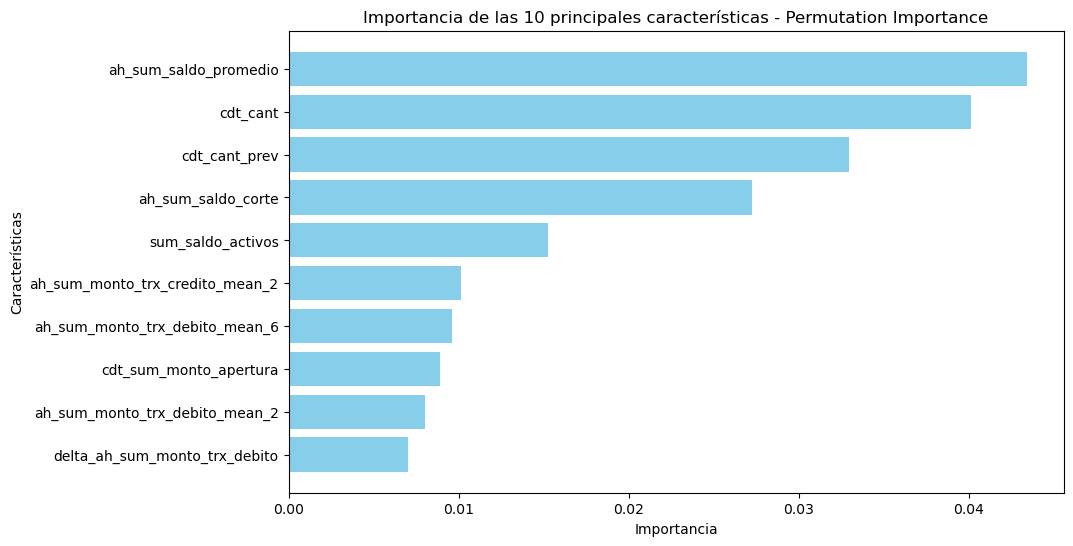

In [35]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# # Realizar predicciones para el conjunto de datos escalado
# y_train_pred_xgb = xgb_model.predict(scal_marzo)
# y_train_proba_xgb = xgb_model.predict_proba(scal_marzo)[:, 1]

# Calcular la importancia de las características por permutación
result = permutation_importance(xgb_model, scal_marzo, y_train_pred_xgb, n_repeats=10, random_state=42)

# Extraer las importancias
feature_importances = result.importances_mean

# Supongamos que scal_marzo es un DataFrame y contiene los nombres de las características
feature_names = scal_marzo.columns

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()


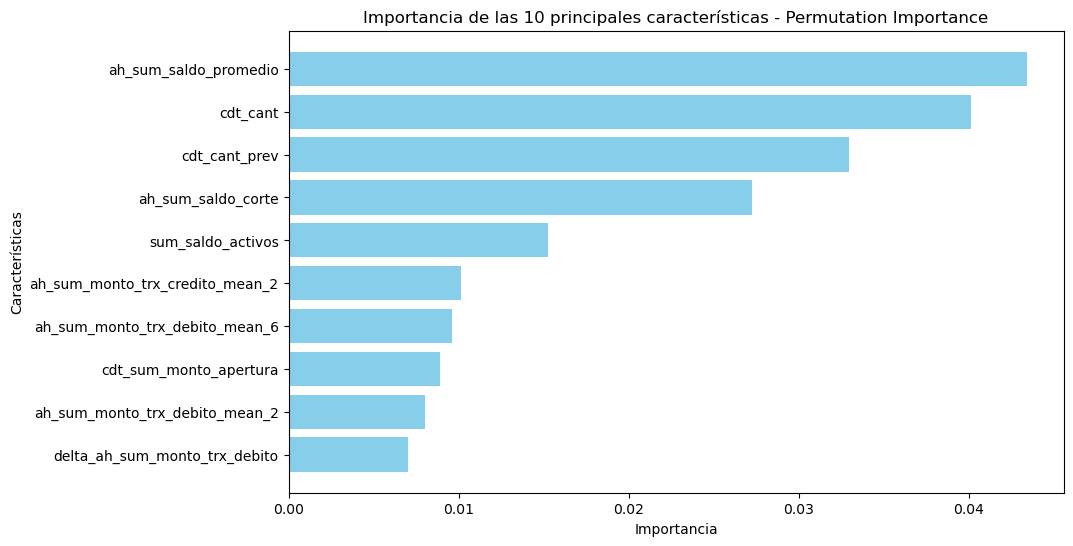

In [36]:
# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()

In [80]:
# from sklearn.metrics import f1_score , classification_report
# mejor_umbral, mejor_f1, results, plt=calcular_umbral_optimo(y_train_pred_xgb, y_train_proba_xgb)

In [64]:
predicciones_marzo_xgb = pd.DataFrame({
    'hashvalue1': hashvalue1,
    'periodo': '202409',
    'y_pred': y_train_pred_xgb,
    'y_pred_proba': y_train_proba_xgb
})

In [78]:
# import matplotlib.pyplot as plt

# # Crear un histograma de la columna y_prob
# plt.hist(predicciones_marzo_xgb['y_pred_proba'], bins=10, edgecolor='k', alpha=0.7)
# plt.xlabel('y_prob')
# plt.ylabel('Frecuencia')
# plt.title('Distribución de y_prob')
# plt.show()

In [79]:
# import matplotlib.pyplot as plt

# # Crear un histograma de la columna y_prob
# plt.hist(predicciones_marzo_xgb['y_pred'], bins=10, edgecolor='k', alpha=0.7)
# plt.xlabel('y_prob')
# plt.ylabel('Frecuencia')
# plt.title('Distribución de y_prob')
# plt.show()

In [44]:
# Asignar el valor 1 a 'y_pred' cuando 'y_pred_proba' sea mayor a 0.4
predicciones_marzo_xgb['y_pred'] = (predicciones_marzo_xgb['y_pred_proba'] > 0.23).astype(int)


In [66]:
predicciones_marzo_xgb['y_pred'].value_counts()


y_pred
0    3039717
1      43133
Name: count, dtype: int64

In [ ]:
predicciones_marzo_xgb

In [46]:
# predicciones_marzo_xgb.to_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/LD/08-model_output/base_calificada_0924.parquet')

In [47]:
# predicciones_marzo_xgb.to_csv( 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/LD/08-model_output/base_calificada_0924.csv',index = False)

In [70]:
# Function to open a parquet file based on a path
def open_parquet(path):
    df = pd.read_parquet(path)
    return df
    
# Marzo pred
df_202403_pred = predicciones_marzo_xgb
 
# # Abril pred
# file_apth = "INSERTAR RUTA DE PREDICCIONES"
# df_202404_pred = open_parquet(file_path)
 
# Marzo test
file_path = "s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/LD/09-backtesting/202404_aperturas_real_LD.parquet"
df_202403_test = open_parquet(file_path)
 
# Abril test
file_path = "s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/LD/09-backtesting/202405_aperturas_real_LD.parquet"
df_202404_test = open_parquet(file_path)
 
def backtesting_top_probabilities(df_pred, df_test, top_n=200000):
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    df_sorted = df_pred.sort_values(by='y_pred_proba', ascending=False).head(top_n)
 
    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(df_test['hashvalue1'])
 
    # Step 3: Get the hashvalues in the top_n sorted df
    top_hashvalues = set(df_sorted['hashvalue1'])
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    percentage_in_top = (len(common_hashvalues) / len(test_hashvalues)) * 100
 
    # Step 5: print results
    print(f"Percentage of test present in the top {top_n} predictions: {percentage_in_top:.2f}%")
 
    return percentage_in_top
 
print("Resultados marzo")
percentage_in_top = backtesting_top_probabilities(df_202403_pred, df_202403_test)
 

Resultados marzo
Percentage of test present in the top 200000 predictions: 11.95%


In [68]:
print("Resultados marzo")
percentage_in_top = backtesting_top_probabilities(df_202403_pred, df_202404_test)

Resultados marzo
Percentage of test present in the top 200000 predictions: 11.02%


## Analisis Backtesting 

In [81]:
df_202403_test

,hashvalue1
0,CC1006010514
1,CC16789760
2,CC1003806845
3,CC27204104
4,CC1010210189
...,...
28975,CE582315
28976,CE518375
28977,CE316691
28978,CE440155


In [ ]:
aperturas= marzo['ld_target_ap

In [87]:
marzo['ld_target_ap'].value_counts()


ld_target_ap
0    3070228
1      12622
Name: count, dtype: int64

In [92]:
aperturas_599=marzo['hashvalue1'][marzo['ld_target_ap']==1]

In [108]:
# Filtrar el DataFrame y guardar solo los valores de 'hashvalue1' donde 'ld_target_ap' es 1
df_ap599 = pd.DataFrame(abril.loc[abril['ld_target_ap'] == 1, 'hashvalue1'], columns=['hashvalue1'])

In [111]:
df_ap599.shape

(16861, 1)

In [97]:
# Filtrar el DataFrame y guardar solo los valores de 'hashvalue1' donde 'ld_target_ap' es 1
df_ap599 = pd.DataFrame(marzo.loc[marzo['ld_target_ap'] == 1, 'hashvalue1'], columns=['hashvalue1'])


In [104]:
predicciones_marzo_xgb['y_pred'].value_counts()


y_pred
0    3039717
1      43133
Name: count, dtype: int64

In [101]:
df_pred_model= pd.DataFrame(predicciones_marzo_xgb.loc[predicciones_marzo_xgb['y_pred'] == 1, 'hashvalue1'], columns=['hashvalue1'])

In [112]:
# Realiza un merge para encontrar los hashvalues comunes
common_hashvalues = pd.merge(df_202403_test['hashvalue1'], df_ap599['hashvalue1'], on='hashvalue1')

# Devuelve el número de registros en común
len(common_hashvalues)


14509

In [113]:
# Realiza un merge para encontrar los hashvalues comunes
common_hashvalues = pd.merge(df_ap599['hashvalue1'], df_pred_model['hashvalue1'], on='hashvalue1')

# Devuelve el número de registros en común
len(common_hashvalues)


579

In [114]:
# Realiza un merge para encontrar los hashvalues comunes
common_hashvalues = pd.merge(df_202403_test['hashvalue1'], df_pred_model['hashvalue1'], on='hashvalue1')

# Devuelve el número de registros en común
len(common_hashvalues)


578

In [246]:
y_train_pred = rf_model.predict(scal_marzo)
y_train_proba = rf_model.predict_proba(scal_marzo)[:, 1]

[09/05/24 17:46:22] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=566489;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=813232;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             RandomForestClassifier was fitted without feature names                               
                               warnings.warn(                                                                      
                                                                                                                   

[09/05/24 17:50:10] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=413687;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=194812;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/base.py:486: UserWarning: X has feature names, but                    
                             RandomForestClassifier was fitted without feature names                               
                               warnings.warn(                                                                      
                                                                                                                   

In [71]:
def calcular_umbral_optimo(y_test, y_prob):
    """
    Calcula el umbral de probabilidad que maximiza el F1 score para un modelo de clasificación binaria y genera una gráfica del F1 score en función del umbral.
 
    Parámetros
    ----------
    y_test : array_like
        Arreglo que contiene las etiquetas verdaderas.
    y_prob : array_like
        Arreglo que contiene las probabilidades predichas de la clase positiva.
 
    Devoluciones
    -------
    float
        El umbral de probabilidad que maximiza el F1 score.
 
    Ejemplos
    --------
    >>> y_test = np.array([0, 0, 1, 1])
    >>> y_prob = np.array([0.1, 0.4, 0.35, 0.8])
    >>> calcular_umbral_optimo(y_test, y_prob)
    El umbral óptimo es: 0.35
    """
    # Inicializar el mejor umbral y el mejor F1 score
 
    
    mejor_umbral = 0
    mejor_f1 = 0
    
    # Listas para almacenar los valores de los umbrales y los F1 scores
    umbrales = []
    f1_scores = []
    
    # Probar umbrales entre 0 y 1
    for umbral in np.arange(0, 1, 0.02):
        # Calcular las predicciones usando el umbral actual
        y_pred = (y_prob >= umbral).astype(int)
        
        # Calcular el F1 score
        f1 = f1_score(y_test, y_pred)
        
        # Actualizar el mejor umbral y el mejor F1 score si es necesario
        if f1 > mejor_f1:
            mejor_umbral = umbral
            mejor_f1 = f1
        
        # Almacenar los valores del umbral y el F1 score
        umbrales.append(umbral)
        f1_scores.append(f1)
    
    y_pred = (y_prob >= mejor_umbral).astype(int)
    results = classification_report(y_test,y_pred,output_dict=False)
    
    # Generar la gráfica del F1 score en función del umbral de probabilidad
    plt.figure(figsize=(10, 6))
    plt.plot(umbrales, f1_scores, marker='o')
    plt.title('F1 Score en función del Umbral de Probabilidad')
    plt.xlabel('Umbral de Probabilidad')
    plt.ylabel('F1 Score')
    plt.grid(True)
    
    
    return mejor_umbral, mejor_f1, results, plt


In [247]:
predicciones_marzo = pd.DataFrame({
    'hashvalue1': hashvalue1,
    'pred': y_train_pred,
    'proba': y_train_proba
})

In [248]:
# Function to open a parquet file based on a path
def open_parquet(path):
    df = pd.read_parquet(path)
    return df
    
# Marzo pred
df_202403_pred = predicciones_marzo
 
# # Abril pred
# file_apth = "INSERTAR RUTA DE PREDICCIONES"
# df_202404_pred = open_parquet(file_path)
 
# Marzo test
file_path = "s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/LD/09-backtesting/202404_aperturas_real_LD.parquet"
df_202403_test = open_parquet(file_path)
 
# Abril test
file_path = "s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/LD/09-backtesting/202405_aperturas_real_LD.parquet"
df_202404_test = open_parquet(file_path)
 
def backtesting_top_probabilities(df_pred, df_test, top_n=200000):
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    df_sorted = df_pred.sort_values(by='proba', ascending=False).head(top_n)
 
    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(df_test['hashvalue1'])
 
    # Step 3: Get the hashvalues in the top_n sorted df
    top_hashvalues = set(df_sorted['hashvalue1'])
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    percentage_in_top = (len(common_hashvalues) / len(test_hashvalues)) * 100
 
    # Step 5: print results
    print(f"Percentage of test present in the top {top_n} predictions: {percentage_in_top:.2f}%")
 
    return percentage_in_top
 
print("Resultados marzo")
percentage_in_top = backtesting_top_probabilities(df_202403_pred, df_202404_test)
 

Resultados marzo
Percentage of test present in the top 200000 predictions: 12.90%


In [183]:
marzo['periodo'].value_counts()


periodo
202404    3076308
Name: count, dtype: int64

In [173]:
predicciones_marzo['pred'].value_counts()


pred
0    1093286
1      22159
Name: count, dtype: int64

In [239]:
df_202404_test

,hashvalue1
0,CC1075313228
1,CC1127349390
2,CC1001852947
3,CC36954887
4,CC1214713313
...,...
27369,EE433139
27370,EE7392451
27371,EE323233
27372,EE700180


In [167]:
df_202403_test

,hashvalue1
0,CC1006010514
1,CC16789760
2,CC1003806845
3,CC27204104
4,CC1010210189
...,...
28975,CE582315
28976,CE518375
28977,CE316691
28978,CE440155


In [177]:
filter_df= predicciones_marzo[predicciones_marzo['pred']==1]

In [178]:
filter_df.shape

(22159, 3)

In [187]:
filter_df.head(10)

,hashvalue1,pred,proba
63,CC1000326786,1,0.991429
221,CC1001089168,1,0.620000
423,CC1002415067,1,0.671770
573,CC1003526093,1,0.542857
649,CC1003950372,1,0.985714
751,CC1004863843,1,0.942119
803,CC1005186444,1,0.596389
820,CC1005290198,1,0.918135
1023,CC1006510174,1,0.977143
1250,CC1007646068,1,0.636190


In [240]:
# Encuentra los valores únicos de hashvalue1 en cada DataFrame
hashvalues_202403 = set(df_202403_test['hashvalue1'].dropna())
hashvalues_marzo = set(df_202404_test['hashvalue1'].dropna())

# Encuentra los valores comunes entre los dos DataFrames
common_hashvalues = hashvalues_202403.intersection(hashvalues_marzo)

# Cuenta cuántos valores comunes hay
count_common_hashvalues = len(common_hashvalues)

print(f'Número de valores hashvalue1 comunes entre df_202403 y marzo: {count_common_hashvalues}')

Número de valores hashvalue1 comunes entre df_202403 y marzo: 107


In [237]:
df_sorted = df_202403_pred.sort_values(by='proba', ascending=False).head(200000)

In [244]:
# Especifica el nombre del archivo donde deseas guardar los datos
archivo_salida = '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/hashvalue1_LD.txt'

# Guarda la columna 'hashvalue1' en un archivo de texto
df_sorted['hashvalue1'].to_csv(archivo_salida, index=False, header=True)

In [245]:
df_sorted['hashvalue1'].to_csv('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/09-bactesting/hashvalue1_LD.txt') 

# Validacion metricas 


In [39]:
models.keys()

dict_keys(['modelo_produccion', 'select_model2'])

In [41]:
models['select_model2']

value name_model model_name  \
class_name metric_name     dataset_name                                   
1          backtest        train         0.031753       Run2  xgboost_1   
                           test          0.125996       Run2  xgboost_1   
           true_sum n_top  train           117470       Run2  xgboost_1   
                           test             23842       Run2  xgboost_1   
           recall n_top    train              1.0       Run2  xgboost_1   
                           test               1.0       Run2  xgboost_1   
           f1-score n_top  train         0.740038       Run2  xgboost_1   
                           test          0.213025       Run2  xgboost_1   
           Precision n_top train          0.58735       Run2  xgboost_1   
                           test           0.11921       Run2  xgboost_1   
0          true_sum n_top  train            82530       Run2  xgboost_1   
                           test            176158       Run2  xgboost_1   
           recall n_top    train              0.0       Run2  xgboost_1   
                           test               0.0       Run2  xgboost_1   
           f1-score n_top  train              0.0       Run2  xgboost_1   
                           test               0.0       Run2  xgboost_1   
           Precision n_top train              0.0       Run2  xgboost_1   
                           test               0.0       Run2  xgboost_1   

                                            select_model  
class_name metric_name     dataset_name                   
1          backtest        train         best_model_name  
                           test          best_model_name  
           true_sum n_top  train         best_model_name  
                           test          best_model_name  
           recall n_top    train         best_model_name  
                           test          best_model_name  
           f1-score n_top  train         best_model_name  
                           test          best_model_name  
           Precision n_top train         best_model_name  
                           test          best_model_name  
0          true_sum n_top  train         best_model_name  
                           test          best_model_name  
           recall n_top    train         best_model_name  
                           test          best_model_name  
           f1-score n_top  train         best_model_name  
                           test          best_model_name  
           Precision n_top train         best_model_name  
                           test          best_model_name

# Sandbox

In [26]:
a=validar_columnas(marzo,parametros)
a.shape

[09/06/24 17:53:30] INFO     La tabla contiene las columnas necesarias                              ]8;id=517673;file:///tmp/ipykernel_174/549525228.py\549525228.py]8;;\:]8;id=117368;file:///tmp/ipykernel_174/549525228.py#72\72]8;;\

(3082850, 106)

In [25]:
def validar_columnas(df: pd.DataFrame, params: Dict[str, List[str]]) -> pd.DataFrame:

    """

    Valida que el DataFrame contenga las columnas definidas en los parámetros.

 

    Parameters

    ----------

    df : pd.DataFrame

        DataFrame a validar.

    params : Dict[str, List[str]]

        Diccionario que contiene la lista de columnas esperadas bajo la clave 'vars'.

 

    Returns

    -------

    pd.DataFrame

        El DataFrame original si todas las columnas están presentes.

 

    Raises

    ------

    NameError

        Si faltan columnas en el DataFrame.

    """

    # Obtener la lista de columnas esperadas

    expected_columns = params.get('vars', [])


    # Identificar las columnas faltantes

    missing_cols = list(set(expected_columns) - set(df.columns))

    # filtar las columnas espereadas

    df=df[expected_columns]

 

    # Si hay columnas faltantes, registrar un error y lanzar una excepción

    if len(missing_cols) > 0:

        logger.error(f"Cantidad de columnas faltantes: {len(missing_cols)}")

        logger.error(f"Columnas faltantes: {missing_cols}")

        raise NameError("La tabla no tiene las columnas necesarias para el procesamiento")

    else:

        # Si no faltan columnas, registrar un mensaje de información

        logger.info("La tabla contiene las columnas necesarias")

        return df